KMean

--- K-Means Clustering ---


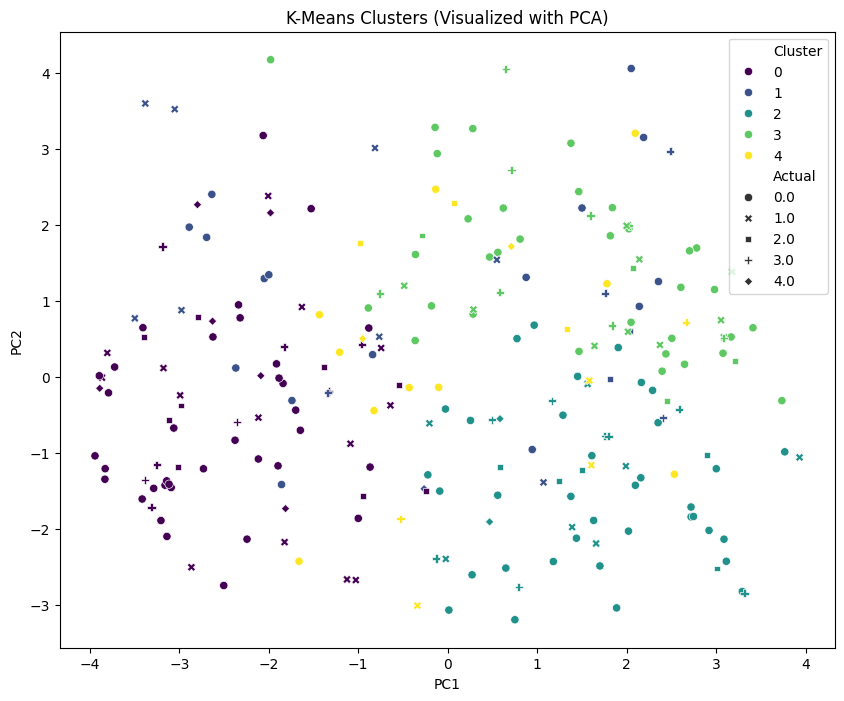


Cross-tabulation of K-Means clusters vs. actual classes:
Cluster   0   1   2   3   4
Actual                     
0.0      35  16  36  33  10
1.0      14   8   7  10   3
2.0       9   2   5   4   3
3.0       8   4   8   8   2
4.0       6   1   2   0   2


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
print("--- K-Means Clustering ---")

# Determine the number of clusters (n_clusters)
# Since we know the true number of classes is 5, we will use k=5.
# If you didn't know, you could use the Elbow Method to find the optimal k.
k = 5
kmeans_model = KMeans(n_clusters=k, random_state=42, n_init=10)

# Fit the model and get the cluster labels
kmeans_labels = kmeans_model.fit_predict(X_train_scaled)

# Visualize the clusters
# We'll use the first two principal components to visualize the 5D data
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = kmeans_labels
df_pca['Actual'] = y

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', style='Actual', data=df_pca, palette='viridis', legend='full')
plt.title('K-Means Clusters (Visualized with PCA)')
plt.show()

# Evaluate how well the clusters align with the true labels
print("\nCross-tabulation of K-Means clusters vs. actual classes:")
cross_tab = pd.crosstab(df_pca['Actual'], df_pca['Cluster'])
print(cross_tab)


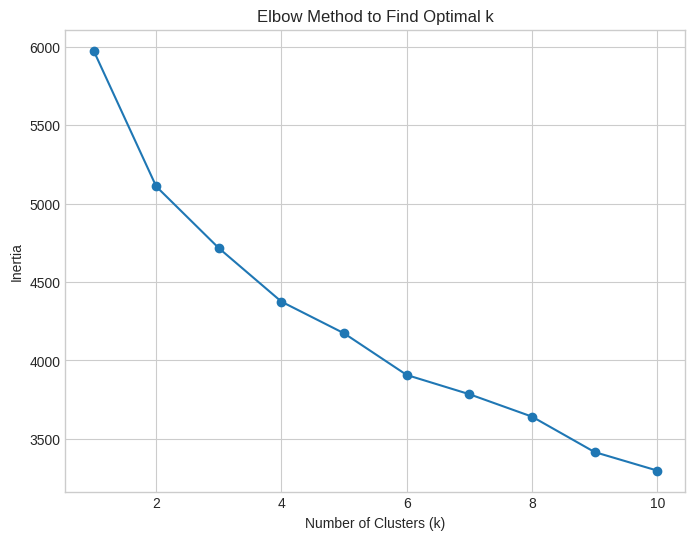

     age  trestbps   chol    thalch   oldpeak   ca  sex_Female  sex_Male  \
6     62     140.0  268.0  5.081404  1.526056  2.0        True     False   
185   63     140.0  195.0  5.192957  0.000000  2.0        True     False   
187   66     160.0  246.0  4.795791  0.000000  3.0       False      True   
147   41     112.0  250.0  5.192957  0.000000  0.0       False      True   
30    69     140.0  239.0  5.023881  1.029619  2.0        True     False   

     cp_asymptomatic  cp_atypical angina  ...  restecg_st-t abnormality  \
6               True               False  ...                     False   
185            False                True  ...                     False   
187            False                True  ...                     False   
147            False               False  ...                     False   
30             False               False  ...                     False   

     exang_False  exang_True  slope_downsloping  slope_flat  slope_upsloping  \
6           

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# --- 1. Load your preprocessed numerical data ---
# This assumes you have a pandas DataFrame with only the numerical features
# (or the preprocessed numerical and one-hot encoded features).
# We'll use dummy data for this example.

X_scaled = scaler.fit_transform(X_train)

# --- 2. Find the optimal number of clusters (k) using the Elbow Method ---
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method to Find Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# --- 3. Apply K-Means with the chosen number of clusters ---
# Let's say the Elbow Method suggests k=4
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Add the cluster labels back to your original DataFrame
X_train['cluster'] = clusters
print(X_train.head())

# Now you can analyze each cluster (e.g., find the mean of each feature for each cluster)
print(X_train.groupby('cluster').mean())

Hierachial Clustering


--- Hierarchical Clustering ---


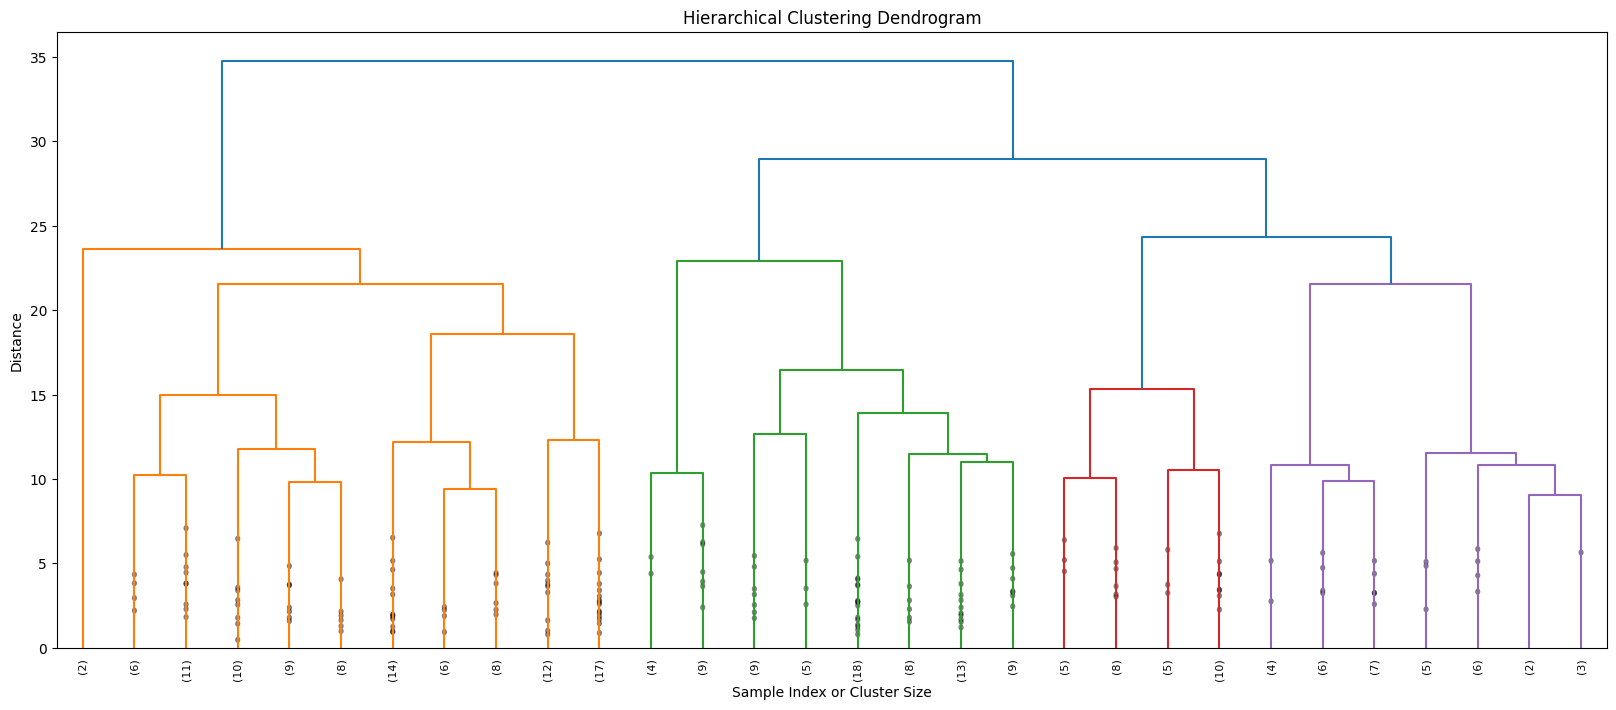


Cross-tabulation of Hierarchical clusters vs. actual classes:
Hierarchical_Cluster   0   1   2   3  4
Actual                                 
0.0                   40  18  57  14  1
1.0                   15   4  17   6  0
2.0                    7   5   9   2  0
3.0                    8   2  15   4  1
4.0                    5   4   1   1  0


In [ ]:
print("\n--- Hierarchical Clustering ---")

# Linkage matrix
# This calculates the distances between each sample
Z = linkage(X_train_scaled, method='ward') # 'ward' minimizes the variance of the clusters being merged

# Plot the dendrogram
plt.figure(figsize=(20, 8))
dendrogram(Z,
           truncate_mode='lastp',  # Show only the last p merged clusters
           p=30,                   # Show only the last 30 merged clusters
           leaf_rotation=90.,      # Rotate the labels
           leaf_font_size=8.,      # Font size for the labels
           show_contracted=True)    # Show contracted nodes
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index or Cluster Size')
plt.ylabel('Distance')
plt.show()

# Apply Agglomerative Clustering
# We set n_clusters=4 to get the same number of clusters as K-Means
hclust_model = AgglomerativeClustering(n_clusters=k, linkage='ward')
hclust_labels = hclust_model.fit_predict(X_train_scaled)

# Evaluate how well the hierarchical clusters align with the true labels
df_pca['Hierarchical_Cluster'] = hclust_labels
print("\nCross-tabulation of Hierarchical clusters vs. actual classes:")
cross_tab_hclust = pd.crosstab(df_pca['Actual'], df_pca['Hierarchical_Cluster'])
print(cross_tab_hclust)